<a href="https://colab.research.google.com/github/Sebastiao199/Project3MRS/blob/main/5)_Viz_Ratings_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import regex as re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
link_rt = 'https://raw.githubusercontent.com/Sebastiao199/Project3MRS/main/OtherTables/out4.csv'
link_imdb = 'https://raw.githubusercontent.com/Sebastiao199/Project3MRS/main/OtherTables/tprn_10.csv'
link_merge = 'https://raw.githubusercontent.com/Sebastiao199/Project3MRS/main/TablesForStreamlit/directors_rt_imdb1.csv'
imdb = pd.read_csv(link_imdb)
rt = pd.read_csv(link_rt)
merge_rt_imdb = pd.read_csv(link_merge)

In [ ]:
cond1= imdb['category']=='director'
imdb1 = imdb[cond1]
imdb1


,Unnamed: 0,tconst,Movie title,Year,Genres,nconst,category,IMDb rating,Nb votes,Staff name
4,4320,tt0004972,The Birth of a Nation,1915,"Drama,History,War",nm0000428,director,6.2,24922.0,D.W. Griffith
9,10770,tt0006864,Intolerance,1916,"Drama,History",nm0000428,director,7.7,15692.0,D.W. Griffith
15,25195,tt0009968,Broken Blossoms,1919,"Drama,Romance",nm0000428,director,7.3,10437.0,D.W. Griffith
22,26838,tt0010323,The Cabinet of Dr. Caligari,1920,"Horror,Mystery,Thriller",nm0927468,director,8.0,64319.0,Robert Wiene
27,31277,tt0011237,The Golem,1920,"Fantasy,Horror",nm0091380,director,7.2,7825.0,Carl Boese
...,...,...,...,...,...,...,...,...,...,...
68477,3363277,tt9893250,I Care a Lot,2020,"Comedy,Crime,Drama",nm2128335,director,6.3,132623.0,J Blakeson
68482,3363431,tt9894470,VFW,2019,"Action,Crime,Horror",nm3976308,director,6.1,8558.0,Joe Begos
68487,3363819,tt9898858,Coffee & Kareem,2020,"Action,Comedy,Crime",nm0236226,director,5.1,13801.0,Michael Dowse
68492,3364105,tt9900782,Kaithi,2019,"Action,Adventure,Crime",nm7992231,director,8.5,31732.0,Lokesh Kanagaraj


In [ ]:
imdb1 = imdb1.fillna('')
imdb2 = imdb1.groupby(['tconst', 'Year','IMDb rating', 'Nb votes']).agg({'Movie title' : 'first', 'Staff name' : ' '.join}).reset_index()
imdb2

,tconst,Year,IMDb rating,Nb votes,Movie title,Staff name
0,tt0004972,1915,6.2,24922.0,The Birth of a Nation,D.W. Griffith
1,tt0006864,1916,7.7,15692.0,Intolerance,D.W. Griffith
2,tt0009968,1919,7.3,10437.0,Broken Blossoms,D.W. Griffith
3,tt0010323,1920,8.0,64319.0,The Cabinet of Dr. Caligari,Robert Wiene
4,tt0011237,1920,7.2,7825.0,The Golem,Carl Boese
...,...,...,...,...,...,...
13001,tt9893250,2020,6.3,132623.0,I Care a Lot,J Blakeson
13002,tt9894470,2019,6.1,8558.0,VFW,Joe Begos
13003,tt9898858,2020,5.1,13801.0,Coffee & Kareem,Michael Dowse
13004,tt9900782,2019,8.5,31732.0,Kaithi,Lokesh Kanagaraj


In [ ]:
#imdb2['rounded_rating'] = imdb2['IMDb rating'].apply(lambda x : round(x,0))
#imdb2

In [ ]:
#imdb2['IMDb rating'].value_counts()

In [ ]:
#imdb2['rounded_rating'].describe()

In [ ]:
#sns.histplot(data = imdb2, x='rounded_rating', binwidth=2)

Text(0.5, 1.0, "Ratings' distribution")

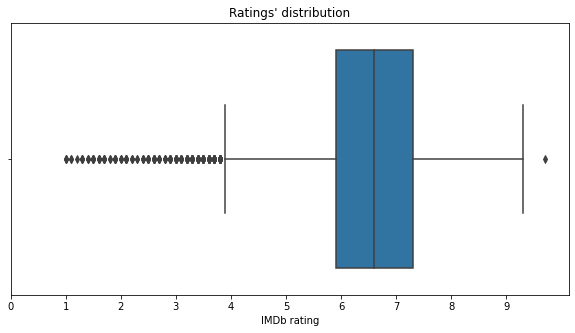

In [ ]:
## Viz 1 - IMDB dataset ratings distribution
fig, ax = plt.subplots(figsize = (10, 5))
sns.boxplot(data = imdb2, x='IMDb rating')
ax.set_xticks(np.arange(0, 10, 1))
ax.set_title("Ratings' distribution")

Text(0.5, 1.0, "Evolution of movies' ratings")

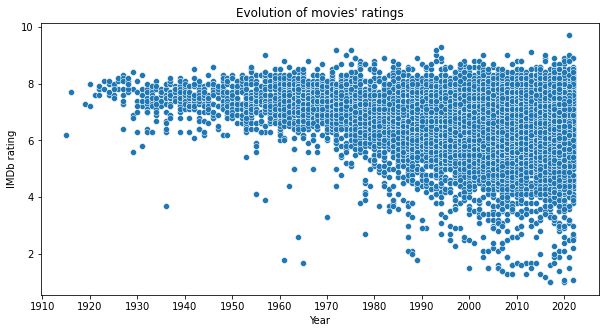

In [ ]:
## Viz 2 - Evolution of IMDB ratings through the years
fig, ax = plt.subplots(figsize = (10, 5))
sns.scatterplot(data = imdb2, x='Year', y='IMDb rating')
ax.set_xticks(np.arange(1910, 2022, 10))
ax.set_title("Evolution of movies' ratings")

Rotten Tomatoes

In [ ]:
rt['Critics rating']=rt['tomatometer_rating'].apply(lambda x: x/10)
rt['Audience rating']=rt['audience_rating'].apply(lambda x: x/10)

In [ ]:
#fig, ax = plt.subplots(figsize = (10, 5))
#sns.boxplot(data = rt, x='Critics rating')
#ax.set_xticks(np.arange(0, 10, 1))
#ax.set_title("Ratings' distribution")

In [ ]:
#fig, ax = plt.subplots(figsize = (10, 5))
#sns.boxplot(data = rt, x='Audience rating')
#ax.set_xticks(np.arange(0, 10, 1))
#ax.set_title("Ratings' distribution")

Text(0.5, 1.0, 'Critics vs Audience ratings')

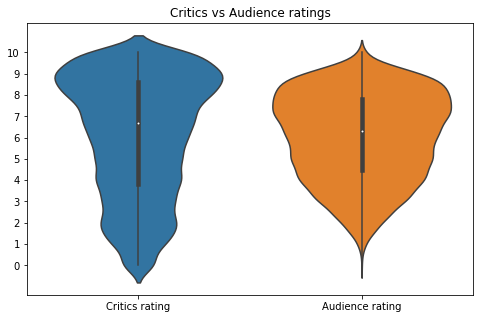

In [ ]:
## Viz 3 - Rotten tomatoes dataset - Critivs vs audience ratings
rates = rt.iloc[:,[-2,-1]]
fig, ax = plt.subplots(figsize = (8, 5))
sns.violinplot(data=rates)
ax.set_yticks(np.arange(0, 11, 1))
ax.set_title('Critics vs Audience ratings')

In [ ]:
rates.describe()

,Critics rating,Audience rating
count,17668.000000,17416.000000
mean,6.088476,6.055426
std,2.844335,2.054337
min,0.000000,0.000000
25%,3.800000,4.500000
50%,6.700000,6.300000
75%,8.600000,7.800000
max,10.000000,10.000000


IMDB Rotten tomatoes merged! Final dataset used for streamlit

In [ ]:
merge_rt_imdb['Rotten Tomatoes rating_adj']=merge_rt_imdb['Rotten Tomatoes rating'].apply(lambda x: x/10)
merge_rt_imdb

,tconst,Year,IMDb rating,Movie title,rotten_tomatoes_link,Director name,movie_title,tomatometer_status,Rotten Tomatoes rating,Rotten Tomatoes rating_adj
0,tt0004972,1915,6.2,The Birth of a Nation,m/birth_of_a_nation,D.W. Griffith,The Birth of a Nation,Fresh,93.0,9.3
1,tt0006864,1916,7.7,Intolerance,m/1010644-intolerance,D.W. Griffith,Intolerance,Fresh,97.0,9.7
2,tt0009968,1919,7.3,Broken Blossoms,m/1003120-broken_blossoms,D.W. Griffith,Broken Blossoms,Fresh,95.0,9.5
3,tt0010323,1920,8.0,The Cabinet of Dr. Caligari,m/the_cabinet_of_dr_caligari,Robert Wiene,The Cabinet of Dr. Caligari (Das Cabinet des D...,Certified-Fresh,98.0,9.8
4,tt0011237,1920,7.2,The Golem,NaN,Carl Boese,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
14227,tt9893250,2020,6.3,I Care a Lot,NaN,J Blakeson,NaN,NaN,NaN,NaN
14228,tt9894470,2019,6.1,VFW,m/vfw,Joe Begos,VFW,Fresh,81.0,8.1
14229,tt9898858,2020,5.1,Coffee & Kareem,m/coffee_and_kareem,Michael Dowse,Coffee & Kareem,Rotten,20.0,2.0
14230,tt9900782,2019,8.5,Kaithi,NaN,Lokesh Kanagaraj,NaN,NaN,NaN,NaN


In [ ]:
rt_rates = merge_rt_imdb[['Rotten Tomatoes rating_adj','IMDb rating']]
cond = rt_rates['Rotten Tomatoes rating_adj'].notna()
rt_rates2=rt_rates[cond]

Text(0.5, 1.0, 'Rotten tomatoes vs IMDb ratings')

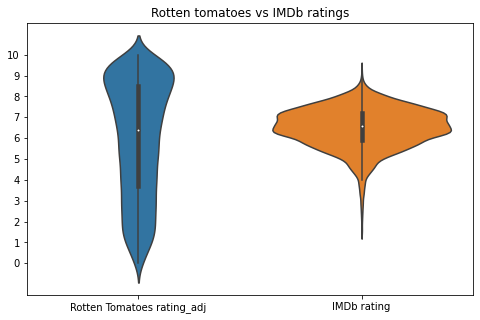

In [ ]:
## Viz 4 - Rotten tomatoes vs IMDb ratings
fig, ax = plt.subplots(figsize = (8, 5))
sns.violinplot(data=rt_rates2)
ax.set_yticks(np.arange(0, 11, 1))
ax.set_title('Rotten tomatoes vs IMDb ratings')